In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("/home/bnt4me/virginia/bedbase_data/bedbase_data_unique.csv")

In [11]:
data

,gsm,sample_name,genome,last_update_date,submission_date
0,gsm1000063,licr_chipseq_kidney_h3k36me3_adult-8wks,NaN,Sep 10 2012,Sep 10 2012
1,gsm1000064,licr_chipseq_smintestine_h3k27me3_adult-8wks,NaN,Sep 10 2012,Sep 10 2012
2,gsm1000065,licr_chipseq_bmdm_h3k4me3_adult-8wks,NaN,Sep 10 2012,Sep 10 2012
3,gsm1000066,licr_chipseq_bmdm_h3k4me1_adult-8wks,NaN,Sep 10 2012,Sep 10 2012
4,gsm1000067,licr_chipseq_testis_h3k36me3_adult-8wks,NaN,Sep 10 2012,Sep 10 2012
...,...,...,...,...,...
117408,gsm999788,bap1_flag_chip-seq,mm9,Sep 10 2012,Sep 10 2012
117409,gsm999789,hcf1_chip-seq,mm9,Sep 10 2012,Sep 10 2012
117410,gsm999790,ogt1_chip-seq,mm9,Sep 10 2012,Sep 10 2012
117411,gsm999792,pr-binding_leiomyoma_chip-seq,hg19,Sep 10 2012,Sep 10 2012


In [103]:
data["update_year"] = pd.to_datetime(data["last_update_date"]).dt.strftime('%Y')

In [17]:
data["submission_year"] = pd.to_datetime(data["submission_date"]).dt.strftime('%Y')

In [104]:
data1 = data.groupby("submission_year", as_index=False).count()

In [106]:
data2 = data.groupby("update_year", as_index=False).count()

In [105]:
data1

,submission_year,gsm,sample_name,genome,last_update_date,submission_date,update_year
0,2008,41,41,0,41,41,41
1,2009,410,410,0,410,410,410
2,2010,469,469,0,469,469,469
3,2011,1985,1985,98,1985,1985,1985
4,2012,4215,4215,1331,4215,4215,4215
5,2013,1766,1766,1550,1766,1766,1766
6,2014,2510,2510,2404,2510,2510,2510
7,2015,3805,3805,3645,3805,3805,3805
8,2016,8292,8292,8177,8292,8292,8292
9,2017,7939,7939,7819,7939,7939,7939


In [59]:
data_count = data1[["submission_year", "sample_name"]]

In [60]:
data_count

,submission_year,sample_name
0,2008,41
1,2009,410
2,2010,469
3,2011,1985
4,2012,4215
5,2013,1766
6,2014,2510
7,2015,3805
8,2016,8292
9,2017,7939


In [50]:
type(data_count)

pandas.core.frame.DataFrame

In [57]:
data_count['sample_name'].cumsum()

0         41
1        451
2        920
3       2905
4       7120
5       8886
6      11396
7      15201
8      23493
9      31432
10     38533
11     59332
12     69789
13     86373
14    101873
15    112098
16    117413
Name: sample_name, dtype: int64

In [61]:
data_count['summary'] = data_count['sample_name'].cumsum()

/tmp/ipykernel_142310/635153305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_count['summary'] = data_count['sample_name'].cumsum()


In [ ]:
# data_count.loc[:, 'summary'] = data_count['sample_name'].cumsum()

In [62]:
data_count

,submission_year,sample_name,summary
0,2008,41,41
1,2009,410,451
2,2010,469,920
3,2011,1985,2905
4,2012,4215,7120
5,2013,1766,8886
6,2014,2510,11396
7,2015,3805,15201
8,2016,8292,23493
9,2017,7939,31432


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

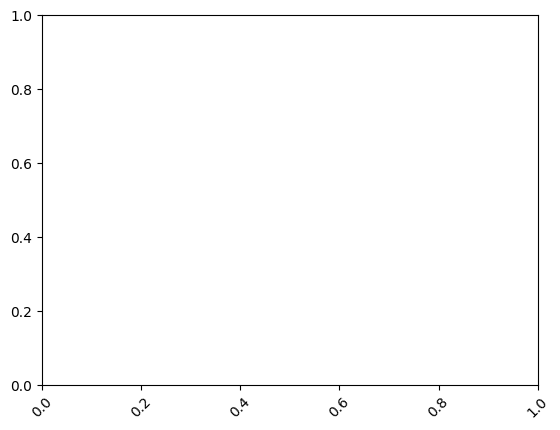

In [93]:
fig, ax = plt.subplots()
plt.xticks(rotation=45)

In [117]:
ax.bar(data_count["submission_year"], 
       data_count["summary"], 
       label=data_count["submission_year"], 
       color="green")

ax.set_xlabel('Year')
ax.set_ylabel('Number of files')
ax.set_title('Cumulative number of BED files')

Text(0.5, 1.0, 'Cumulative number of BED files')

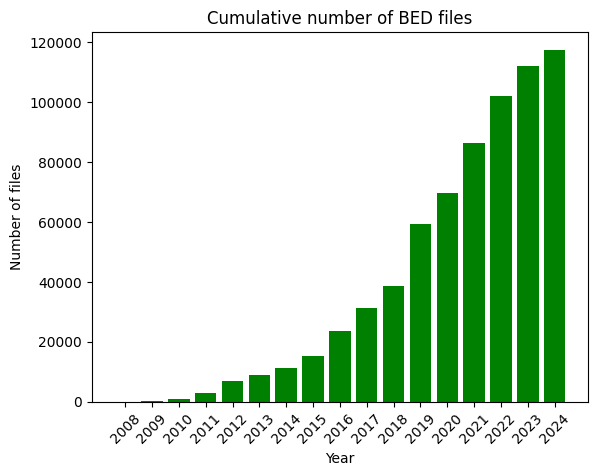

In [118]:
fig

In [119]:
fig.savefig('./bed_geo_sep_24.svg')

Text(0.5, 1.0, 'Number of BED files')

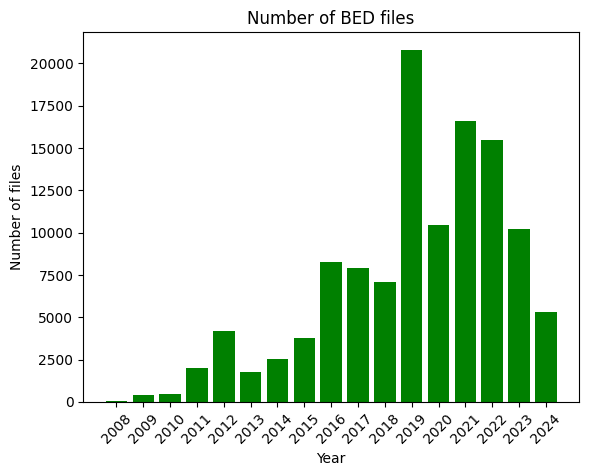

In [100]:
fig1, ax1 = plt.subplots()
plt.xticks(rotation=45)

ax1.bar(data_count["submission_year"], 
       data_count["sample_name"], 
       label=data_count["submission_year"], 
       color="green")

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of files')
ax1.set_title('Number of BED files')

In [107]:
# UPDATE DATE

In [113]:
data2

,update_year,gsm,sample_name,genome,last_update_date,submission_date,submission_year
0,2008,41,41,0,41,41,41
1,2009,410,410,0,410,410,410
2,2010,469,469,0,469,469,469
3,2011,1985,1985,98,1985,1985,1985
4,2012,4215,4215,1331,4215,4215,4215
5,2013,1766,1766,1550,1766,1766,1766
6,2014,2510,2510,2404,2510,2510,2510
7,2015,3805,3805,3645,3805,3805,3805
8,2016,8292,8292,8177,8292,8292,8292
9,2017,7939,7939,7819,7939,7939,7939


In [109]:
data_count2 = data2[["update_year", "sample_name"]]

In [110]:
data_count2['summary'] = data_count2['sample_name'].cumsum()

/tmp/ipykernel_142310/609132149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_count2['summary'] = data_count2['sample_name'].cumsum()


In [114]:
data_count2

,update_year,sample_name,summary
0,2008,41,41
1,2009,410,451
2,2010,469,920
3,2011,1985,2905
4,2012,4215,7120
5,2013,1766,8886
6,2014,2510,11396
7,2015,3805,15201
8,2016,8292,23493
9,2017,7939,31432


Text(0.5, 1.0, 'Number of BED files')

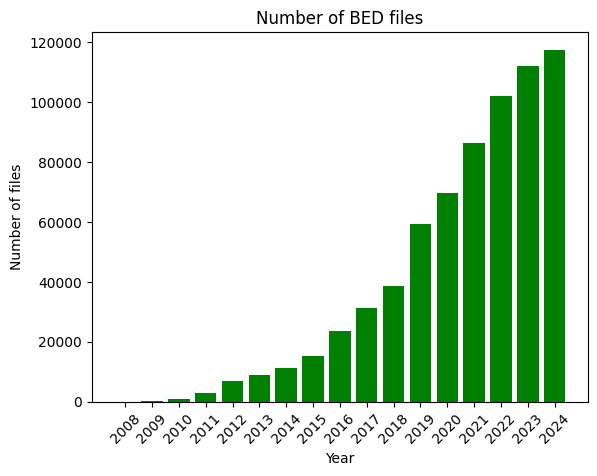

In [112]:
fig2, ax2 = plt.subplots()
plt.xticks(rotation=45)

ax2.bar(data_count2["update_year"], 
       data_count2['summary'], 
       label=data_count2["update_year"], 
       color="green")

ax2.set_xlabel('Year')
ax2.set_ylabel('Number of files')
ax2.set_title('Number of BED files')